In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("ah_kalbim.csv")

In [3]:
df.head()

,yas,cinsiyet,gogus_agrı_tipi,dinlenme_kan_basıncı,Kolesterol,Aclık_Kan_Sekeri,Elektrokardiyografik_Ölcümü,Ulasılan_maks_kalp_hızı,egzersize_baglı_durumu,depresyon_ST,egim,ca,talasemi,amac
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,yas,cinsiyet,gogus_agrı_tipi,dinlenme_kan_basıncı,Kolesterol,Aclık_Kan_Sekeri,Elektrokardiyografik_Ölcümü,Ulasılan_maks_kalp_hızı,egzersize_baglı_durumu,depresyon_ST,egim,ca,talasemi,amac
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   yas                          303 non-null    int64  
 1   cinsiyet                     303 non-null    int64  
 2   gogus_agrı_tipi              303 non-null    int64  
 3   dinlenme_kan_basıncı         303 non-null    int64  
 4   Kolesterol                   303 non-null    int64  
 5   Aclık_Kan_Sekeri             303 non-null    int64  
 6   Elektrokardiyografik_Ölcümü  303 non-null    int64  
 7   Ulasılan_maks_kalp_hızı      303 non-null    int64  
 8   egzersize_baglı_durumu       303 non-null    int64  
 9   depresyon_ST                 303 non-null    float64
 10  egim                         303 non-null    int64  
 11  ca                           303 non-null    int64  
 12  talasemi                     303 non-null    int64  
 13  amac                

In [6]:
df.isnull().sum()

yas                            0
cinsiyet                       0
gogus_agrı_tipi                0
dinlenme_kan_basıncı           0
Kolesterol                     0
Aclık_Kan_Sekeri               0
Elektrokardiyografik_Ölcümü    0
Ulasılan_maks_kalp_hızı        0
egzersize_baglı_durumu         0
depresyon_ST                   0
egim                           0
ca                             0
talasemi                       0
amac                           0
dtype: int64

<Figure size 700x500 with 0 Axes>

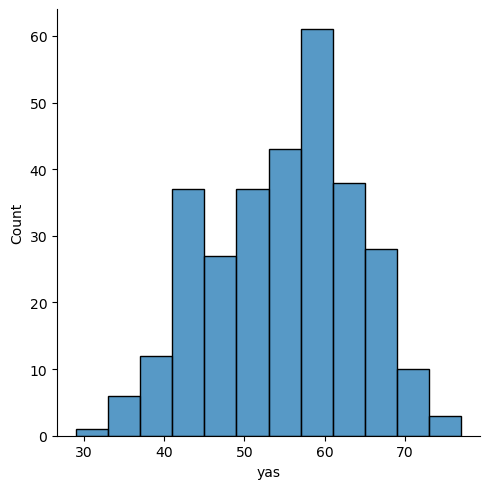

In [7]:
plt.figure(figsize=(7,5))
sbn.displot(df["yas"])

<Axes: xlabel='gogus_agrı_tipi', ylabel='yas'>

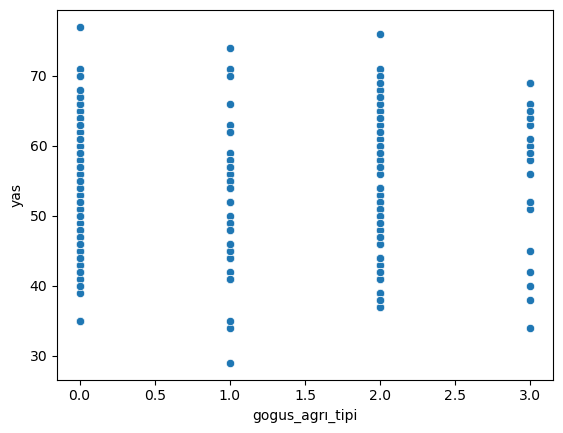

In [9]:
sbn.scatterplot(x="gogus_agrı_tipi",y="yas",data=df)

<Axes: xlabel='Kolesterol', ylabel='yas'>

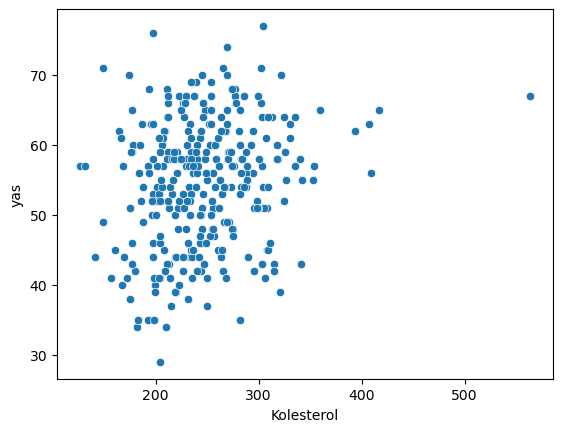

In [11]:
sbn.scatterplot(x="Kolesterol",y="yas",data=df)

In [12]:
df.sort_values("yas",ascending=False).head(20)

,yas,cinsiyet,gogus_agrı_tipi,dinlenme_kan_basıncı,Kolesterol,Aclık_Kan_Sekeri,Elektrokardiyografik_Ölcümü,Ulasılan_maks_kalp_hızı,egzersize_baglı_durumu,depresyon_ST,egim,ca,talasemi,amac
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0


In [13]:
df["Ulasılan_maks_kalp_hızı"].mean()

149.64686468646866

In [14]:
df["yas"].mean()

54.366336633663366

In [15]:
df.sort_values("yas",ascending=True).head(20)

,yas,cinsiyet,gogus_agrı_tipi,dinlenme_kan_basıncı,Kolesterol,Aclık_Kan_Sekeri,Elektrokardiyografik_Ölcümü,Ulasılan_maks_kalp_hızı,egzersize_baglı_durumu,depresyon_ST,egim,ca,talasemi,amac
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


<Axes: xlabel='talasemi', ylabel='yas'>

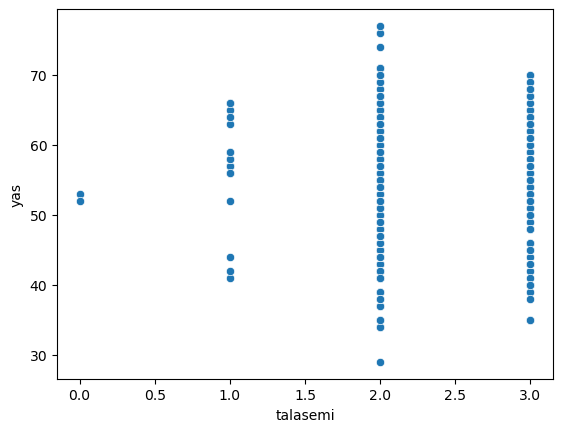

In [16]:
sbn.scatterplot(x="talasemi",y="yas",data=df)

In [17]:
y = df["yas"].values
x = df.drop("yas",axis=1).values

In [18]:
y

array([63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, 50, 58,
       66, 43, 69, 59, 44, 42, 61, 40, 71, 59, 51, 65, 53, 41, 65, 44, 54,
       51, 46, 54, 54, 65, 65, 51, 48, 45, 53, 39, 52, 44, 47, 53, 53, 51,
       66, 62, 44, 63, 52, 48, 45, 34, 57, 71, 54, 52, 41, 58, 35, 51, 45,
       44, 62, 54, 51, 29, 51, 43, 55, 51, 59, 52, 58, 41, 45, 60, 52, 42,
       67, 68, 46, 54, 58, 48, 57, 52, 54, 45, 53, 62, 52, 43, 53, 42, 59,
       63, 42, 50, 68, 69, 45, 50, 50, 64, 57, 64, 43, 55, 37, 41, 56, 46,
       46, 64, 59, 41, 54, 39, 34, 47, 67, 52, 74, 54, 49, 42, 41, 41, 49,
       60, 62, 57, 64, 51, 43, 42, 67, 76, 70, 44, 60, 44, 42, 66, 71, 64,
       66, 39, 58, 47, 35, 58, 56, 56, 55, 41, 38, 38, 67, 67, 62, 63, 53,
       56, 48, 58, 58, 60, 40, 60, 64, 43, 57, 55, 65, 61, 58, 50, 44, 60,
       54, 50, 41, 51, 58, 54, 60, 60, 59, 46, 67, 62, 65, 44, 60, 58, 68,
       62, 52, 59, 60, 49, 59, 57, 61, 39, 61, 56, 43, 62, 63, 65, 48, 63,
       55, 65, 56, 54, 70

In [19]:
x

array([[  1.,   3., 145., ...,   0.,   1.,   1.],
       [  1.,   2., 130., ...,   0.,   2.,   1.],
       [  0.,   1., 130., ...,   0.,   2.,   1.],
       ...,
       [  1.,   0., 144., ...,   2.,   3.,   0.],
       [  1.,   0., 130., ...,   1.,   3.,   0.],
       [  0.,   1., 130., ...,   1.,   2.,   0.]])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [21]:
len(x_train)

212

In [22]:
len(x_test)

91

In [23]:
scaler = MinMaxScaler()

In [24]:
x_train = scaler.fit_transform(x_train)

In [25]:
x_test = scaler.fit_transform(x_test)

In [26]:
x_train.shape

(212, 13)

In [88]:
model = Sequential()

model.add(Dense(35,activation="relu"))
model.add(Dense(35,activation="relu"))
model.add(Dense(35,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))


model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [89]:
model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 891ms/step - loss: 3041.7515 - val_loss: 3034.0962
Epoch 2/300
1/1 [==============================] - 0s 27ms/step - loss: 3038.6133 - val_loss: 3031.1790
Epoch 3/300
1/1 [==============================] - 0s 22ms/step - loss: 3035.6616 - val_loss: 3028.2427
Epoch 4/300
1/1 [==============================] - 0s 19ms/step - loss: 3032.7263 - val_loss: 3025.0886
Epoch 5/300
1/1 [==============================] - 0s 22ms/step - loss: 3029.6350 - val_loss: 3021.6582
Epoch 6/300
1/1 [==============================] - 0s 23ms/step - loss: 3026.2605 - val_loss: 3017.8979
Epoch 7/300
1/1 [==============================] - 0s 23ms/step - loss: 3022.5613 - val_loss: 3013.7542
Epoch 8/300
1/1 [==============================] - 0s 21ms/step - loss: 3018.5146 - val_loss: 3009.2388
Epoch 9/300
1/1 [==============================] - 0s 22ms/step - loss: 3014.0884 - val_loss: 3004.2798
Epoch 10/300
1/1 [==============================] - 0s 21ms/ste

1/1 [==============================] - 0s 20ms/step - loss: 155.5786 - val_loss: 150.3190
Epoch 80/300
1/1 [==============================] - 0s 18ms/step - loss: 147.3621 - val_loss: 150.1008
Epoch 81/300
1/1 [==============================] - 0s 19ms/step - loss: 139.9890 - val_loss: 152.1407
Epoch 82/300
1/1 [==============================] - 0s 21ms/step - loss: 134.1258 - val_loss: 156.5563
Epoch 83/300
1/1 [==============================] - 0s 25ms/step - loss: 130.1590 - val_loss: 163.1506
Epoch 84/300
1/1 [==============================] - 0s 24ms/step - loss: 128.1822 - val_loss: 171.3290
Epoch 85/300
1/1 [==============================] - 0s 25ms/step - loss: 128.0056 - val_loss: 180.1727
Epoch 86/300
1/1 [==============================] - 0s 25ms/step - loss: 129.1385 - val_loss: 188.5670
Epoch 87/300
1/1 [==============================] - 0s 22ms/step - loss: 130.9322 - val_loss: 195.4513
Epoch 88/300
1/1 [==============================] - 0s 25ms/step - loss: 132.6928 - va

1/1 [==============================] - 0s 22ms/step - loss: 84.0829 - val_loss: 126.6499
Epoch 159/300
1/1 [==============================] - 0s 22ms/step - loss: 83.5861 - val_loss: 126.4393
Epoch 160/300
1/1 [==============================] - 0s 24ms/step - loss: 83.0902 - val_loss: 126.1777
Epoch 161/300
1/1 [==============================] - 0s 23ms/step - loss: 82.5914 - val_loss: 125.8641
Epoch 162/300
1/1 [==============================] - 0s 22ms/step - loss: 82.0949 - val_loss: 125.5119
Epoch 163/300
1/1 [==============================] - 0s 23ms/step - loss: 81.6023 - val_loss: 125.1417
Epoch 164/300
1/1 [==============================] - 0s 24ms/step - loss: 81.1120 - val_loss: 124.7625
Epoch 165/300
1/1 [==============================] - 0s 22ms/step - loss: 80.6267 - val_loss: 124.4048
Epoch 166/300
1/1 [==============================] - 0s 21ms/step - loss: 80.1427 - val_loss: 124.0503
Epoch 167/300
1/1 [==============================] - 0s 23ms/step - loss: 79.6599 - val

1/1 [==============================] - 0s 26ms/step - loss: 58.6118 - val_loss: 121.1802
Epoch 238/300
1/1 [==============================] - 0s 23ms/step - loss: 58.4139 - val_loss: 121.1399
Epoch 239/300
1/1 [==============================] - 0s 26ms/step - loss: 58.2178 - val_loss: 121.0676
Epoch 240/300
1/1 [==============================] - 0s 25ms/step - loss: 58.0258 - val_loss: 120.9907
Epoch 241/300
1/1 [==============================] - 0s 26ms/step - loss: 57.8351 - val_loss: 120.8829
Epoch 242/300
1/1 [==============================] - 0s 25ms/step - loss: 57.6476 - val_loss: 120.7637
Epoch 243/300
1/1 [==============================] - 0s 25ms/step - loss: 57.4619 - val_loss: 120.6404
Epoch 244/300
1/1 [==============================] - 0s 27ms/step - loss: 57.2784 - val_loss: 120.4944
Epoch 245/300
1/1 [==============================] - 0s 24ms/step - loss: 57.0968 - val_loss: 120.4037
Epoch 246/300
1/1 [==============================] - 0s 26ms/step - loss: 56.9183 - val

In [92]:
kayipVeri = pd.DataFrame(model.history.history)

In [93]:
kayipVeri.head()

,loss,val_loss
0,3041.751465,3034.096191
1,3038.613281,3031.178955
2,3035.661621,3028.242676
3,3032.726318,3025.088623
4,3029.635010,3021.658203


<Axes: >

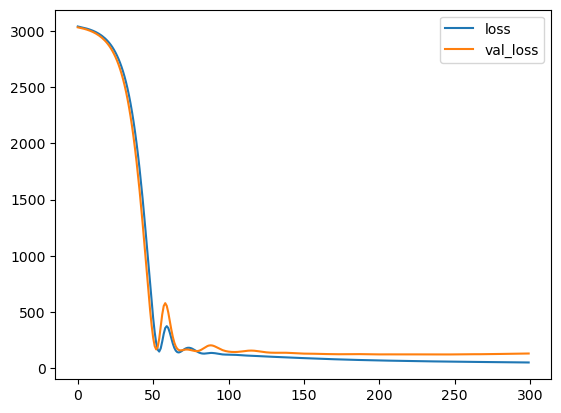

In [94]:
kayipVeri.plot()

In [95]:
tahmin = model.predict(x_test)

3/3 [==============================] - 0s 998us/step


In [96]:
tahmin

array([[62.040882],
       [57.78463 ],
       [54.464516],
       [64.55931 ],
       [57.844696],
       [61.86032 ],
       [62.23257 ],
       [75.016945],
       [55.889427],
       [55.214973],
       [47.44918 ],
       [47.67138 ],
       [57.922977],
       [71.16727 ],
       [78.6703  ],
       [57.485558],
       [59.032063],
       [65.81503 ],
       [64.52701 ],
       [57.05004 ],
       [54.115776],
       [71.77641 ],
       [69.58293 ],
       [67.3125  ],
       [52.87303 ],
       [66.89664 ],
       [65.93982 ],
       [73.90934 ],
       [55.343513],
       [54.958126],
       [66.60785 ],
       [62.15588 ],
       [54.62155 ],
       [56.51288 ],
       [56.000072],
       [61.40142 ],
       [85.47482 ],
       [75.36429 ],
       [55.19495 ],
       [57.36185 ],
       [58.80542 ],
       [68.04637 ],
       [50.949993],
       [75.236565],
       [59.73814 ],
       [71.80404 ],
       [55.869694],
       [47.608334],
       [68.16835 ],
       [48.393585],


In [97]:
mean_absolute_error(y_test,tahmin)

9.263731233366244

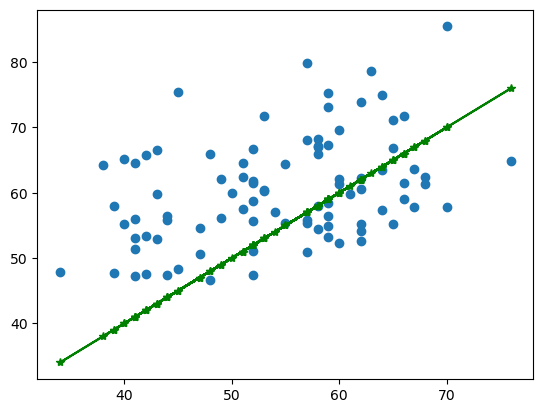

In [99]:
plt.scatter(y_test,tahmin)
plt.plot(y_test,y_test,"g-*")

In [107]:
df.iloc[5]

yas                             57.0
cinsiyet                         1.0
gogus_agrı_tipi                  0.0
dinlenme_kan_basıncı           140.0
Kolesterol                     192.0
Aclık_Kan_Sekeri                 0.0
Elektrokardiyografik_Ölcümü      1.0
Ulasılan_maks_kalp_hızı        148.0
egzersize_baglı_durumu           0.0
depresyon_ST                     0.4
egim                             1.0
ca                               0.0
talasemi                         1.0
amac                             1.0
Name: 5, dtype: float64

In [108]:
yeniVeri = df.drop("yas",axis=1).iloc[5]

In [109]:
type(yeniVeri)

pandas.core.series.Series

In [112]:
yeniVeri = scaler.transform(yeniVeri.values.reshape(-1,13))

In [113]:
model.predict(yeniVeri)

1/1 [==============================] - 0s 15ms/step


array([[50.809967]], dtype=float32)

In [116]:
df.iloc[8]

yas                             52.0
cinsiyet                         1.0
gogus_agrı_tipi                  2.0
dinlenme_kan_basıncı           172.0
Kolesterol                     199.0
Aclık_Kan_Sekeri                 1.0
Elektrokardiyografik_Ölcümü      1.0
Ulasılan_maks_kalp_hızı        162.0
egzersize_baglı_durumu           0.0
depresyon_ST                     0.5
egim                             2.0
ca                               0.0
talasemi                         3.0
amac                             1.0
Name: 8, dtype: float64

In [126]:
yeniVerii = df.drop("yas",axis=1).iloc[8]

In [127]:
yeniVerii = scaler.transform(yeniVerii.values.reshape(-1,13))

In [120]:
model.predict(yeniVeri2)

1/1 [==============================] - 0s 30ms/step


array([[62.872612]], dtype=float32)

In [128]:
df.iloc[20]

yas                             59.0
cinsiyet                         1.0
gogus_agrı_tipi                  0.0
dinlenme_kan_basıncı           135.0
Kolesterol                     234.0
Aclık_Kan_Sekeri                 0.0
Elektrokardiyografik_Ölcümü      1.0
Ulasılan_maks_kalp_hızı        161.0
egzersize_baglı_durumu           0.0
depresyon_ST                     0.5
egim                             1.0
ca                               0.0
talasemi                         3.0
amac                             1.0
Name: 20, dtype: float64

In [131]:
yeniVeriii = df.drop("yas",axis=1).iloc[20]

In [132]:
yeniVeriii = scaler.transform(yeniVeriii.values.reshape(-1,13))

In [133]:
model.predict(yeniVeriii)

1/1 [==============================] - 0s 22ms/step


array([[56.47016]], dtype=float32)

In [134]:
df.iloc[55]

yas                             52.0
cinsiyet                         1.0
gogus_agrı_tipi                  1.0
dinlenme_kan_basıncı           134.0
Kolesterol                     201.0
Aclık_Kan_Sekeri                 0.0
Elektrokardiyografik_Ölcümü      1.0
Ulasılan_maks_kalp_hızı        158.0
egzersize_baglı_durumu           0.0
depresyon_ST                     0.8
egim                             2.0
ca                               1.0
talasemi                         2.0
amac                             1.0
Name: 55, dtype: float64

In [135]:
yeniHastaVerisi = df.drop("yas",axis=1).iloc[55]

In [136]:
yeniHastaVerisi = scaler.transform(yeniHastaVerisi.values.reshape(-1,13))

In [137]:
model.predict(yeniHastaVerisi)

1/1 [==============================] - 0s 19ms/step


array([[51.029644]], dtype=float32)

In [138]:
df.iloc[100]

yas                             42.0
cinsiyet                         1.0
gogus_agrı_tipi                  3.0
dinlenme_kan_basıncı           148.0
Kolesterol                     244.0
Aclık_Kan_Sekeri                 0.0
Elektrokardiyografik_Ölcümü      0.0
Ulasılan_maks_kalp_hızı        178.0
egzersize_baglı_durumu           0.0
depresyon_ST                     0.8
egim                             2.0
ca                               2.0
talasemi                         2.0
amac                             1.0
Name: 100, dtype: float64

In [145]:
yeniHastaVerisi = df.drop("yas",axis=1).iloc[100]

In [146]:
yeniHastaVerisi = scaler.transform(yeniHastaVerisi.values.reshape(-1,13))

In [147]:
model.predict(yeniHastaVerisi)

1/1 [==============================] - 0s 11ms/step


array([[58.747036]], dtype=float32)